In [1]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import random
import os
from tensorflow.keras.utils import load_img

In [2]:
class Neuron():
  def __init__(self):
    self.name = ''
    self.weights = (np.random.rand(32,32)-0.5)*0.06 
  

In [3]:
# n = Neuron()
# n.weights

In [75]:
neurons = []
letters = ['D', 'E', 'N', 'I']

for i, l in enumerate(letters):
  neurons.append(Neuron())
  neurons[i].name = l

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [62]:
def image_to_arr(im_path):
    img = load_img(im_path, target_size = (32,32))
    return np.array(img.convert('L'), dtype='float')/255

In [ ]:
for neuron in neurons:
  plt.imshow(neuron.weights, cmap = 'gray')
  plt.show()


In [76]:
theta = np.random.rand()

print(f"Тета: {theta}")

def activation(sum, theta):
  return sum>=theta

Тета: 0.886768948330179


In [77]:
overall =0
true =0

def learn(pic_array, realname):
  
  for neuron_id in range (4):
    sum = 0
    for i in range (32):
      for j in range (32):
        sum += 0.5*np.multiply(neurons[neuron_id].weights[i][j], pic_array[i][j])
    global overall
    overall += 1

    if (activation(sum, theta) and neurons[neuron_id].name != realname):
      for n in range (32):
        for m in range (32):
          neurons[neuron_id].weights[n][m] -= pic_array[n][m]
      continue
          

    elif (not activation(sum, theta) and neurons[neuron_id].name == realname):
      for n in range (32):
        for m in range (32):
          neurons[neuron_id].weights[n][m] += pic_array[n][m]
      continue
    global true 
    true += 1

    

In [78]:
D_s_learn = os.listdir('/content/drive/MyDrive/Нейронки_МТУСИ/Датасет/D/Обучение')
E_s_learn = os.listdir('/content/drive/MyDrive/Нейронки_МТУСИ/Датасет/E/Обучение')
N_s_learn = os.listdir('/content/drive/MyDrive/Нейронки_МТУСИ/Датасет/N/Обучение')
I_s_learn = os.listdir('/content/drive/MyDrive/Нейронки_МТУСИ/Датасет/I/Обучение')


for i in range (50):

  # Обучение букве D
  for D in D_s_learn: 
    image_path = f'/content/drive/MyDrive/Нейронки_МТУСИ/Датасет/D/Обучение/{D}'
    image_arr = image_to_arr(image_path)
    learn(image_arr, 'D')

  # Обучение букве E
  for E in E_s_learn:
    image_path = f'/content/drive/MyDrive/Нейронки_МТУСИ/Датасет/E/Обучение/{E}'
    image_arr = image_to_arr(image_path)
    learn(image_arr, 'E')

  # Обучение букве N
  for N in N_s_learn:
    image_path = f'/content/drive/MyDrive/Нейронки_МТУСИ/Датасет/N/Обучение/{N}'
    image_arr = image_to_arr(image_path)
    learn(image_arr, 'N')
  
  # Обучение букве I
  for I in I_s_learn:
    image_path = f'/content/drive/MyDrive/Нейронки_МТУСИ/Датасет/I/Обучение/{I}'
    image_arr = image_to_arr(image_path)
    learn(image_arr, 'I')

print(f'Процент правильных распознаваний {(true/overall)*100}%')

Процент правильных распознаваний 98.55555555555556%


Нейрон D: 


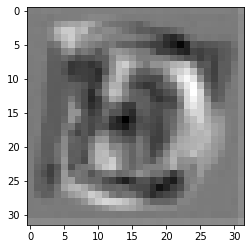

Нейрон E: 


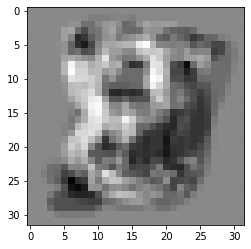

Нейрон N: 


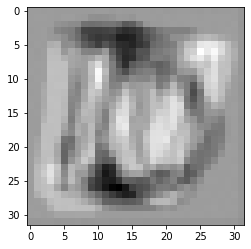

Нейрон I: 


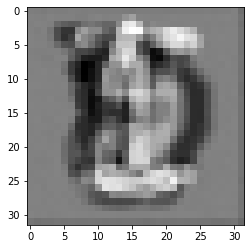

In [80]:
for i, l in enumerate(letters):
  print(f"Нейрон {l}: ")
  plt.imshow(neurons[i].weights, cmap = 'gray')
  plt.show()

In [50]:
def test(pic_array):
  for num in range (4):
    sum = 0
    for i in range (32):
      for j in range (32):
        sum += np.multiply(neurons[num].weights[i][j], pic_array[i][j])
    if (sum >= theta):
      print (f"{neurons[num].name}") 
    elif (sum < theta):
      print (f"Не {neurons[num].name}") 

In [81]:
test_path = '/content/drive/MyDrive/Нейронки_МТУСИ/Датасет/D/Тест/D_test.png'

image_arr = image_to_arr(test_path)

print("Ответы от нейросети: ")
test(image_arr)

Ответы от нейросети: 
Не D
Не E
Не N
Не I


In [82]:
test_path = '/content/drive/MyDrive/Нейронки_МТУСИ/Датасет/E/Тест/E_Test.png'

image_arr = image_to_arr(test_path)

print("Ответы от нейросети: ")
test(image_arr)

Ответы от нейросети: 
Не D
E
Не N
Не I


In [83]:
test_path = '/content/drive/MyDrive/Нейронки_МТУСИ/Датасет/N/Тест/N_Test.png'

image_arr = image_to_arr(test_path)

print("Ответы от нейросети: ")
test(image_arr)

Ответы от нейросети: 
Не D
Не E
N
Не I


In [84]:
test_path = '/content/drive/MyDrive/Нейронки_МТУСИ/Датасет/I/Тест/I_Test.png'

image_arr = image_to_arr(test_path)

print("Ответы от нейросети: ")
test(image_arr)

Ответы от нейросети: 
Не D
Не E
Не N
I
